In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [3]:
# read customers and transactions data

customers = pd.read_csv(r'C:\Users\Nutzer\OneDrive\Desktop\viabill\customers.csv')
transactions = pd.read_csv(r'C:\Users\Nutzer\OneDrive\Desktop\viabill\transactions.csv')

# last available transaction of the client as a credit application
# select the last transaction (transactionID increases with time) for each customer in Transaction table

credit_applications = transactions.groupby(['customerID'], as_index=False).agg({'transactionID':'max'})

# join other related columns of transaction data
new_trans = credit_applications.merge(transactions[['transactionID','price', 'paytmentStatus1',
       'paytmentStatus2', 'paytmentStatus3', 'paytmentStatus4']], on='transactionID', how='left')

# Join transactions df with customers df on customerID
df = pd.merge(new_trans, customers, on='customerID', how='left')

# Replace missing Income values with 999

df['income'] = df['income'].fillna(999)

#create “trans_price_avg_lst3” – for credit applications

df['trans_price_avg_lst3'] = df.groupby('customerID')['price'].rolling(3, min_periods=1).mean().reset_index(0, drop=True)
df['debt_to_income_ratio'] = np.where(df['income']!=999.0,df['price'] / df['income'],999) 
df['income_to_debt_ratio'] = np.where(df['income']!=999.0,df['income'] / df['price'],999) 
df['payment'] = df['price'] / 4
def income_per_age(row):
    if row['age'] <= 20:
        age_group = 1
    elif row['age'] <= 46:
        age_group = 2
    elif row['age'] <= 52:
        age_group = 3
    else:
        age_group = 4
    return row['income'] / age_group

df['income_per_age_group'] = df.apply(income_per_age, axis=1)
df['income_per_age_group'] = np.where(df['income']!=999.0,df['income_per_age_group'],999.0)

df

,customerID,transactionID,price,paytmentStatus1,paytmentStatus2,paytmentStatus3,paytmentStatus4,sex,age,residentialAddress,postalAddress,income,trans_price_avg_lst3,debt_to_income_ratio,income_to_debt_ratio,payment,income_per_age_group
0,1.0,1697842,147,0,0,0,0,1,25,28 Irvine Place,28 Irvine Place,999.0,147.0,999.000000,999.000000,36.75,999.0
1,2.0,1834257,150,0,0,0,0,1,19,72 Bertha Street,72 Bertha Street,43200.0,150.0,0.003472,288.000000,37.50,43200.0
2,3.0,1974624,140,0,0,0,0,2,22,63 Ladberry Street,63 Ladberry Street,70200.0,140.0,0.001994,501.428571,35.00,35100.0
3,4.0,1536291,136,0,1,0,0,0,24,98 Linneman Close,98 Linneman Close,93900.0,136.0,0.001448,690.441176,34.00,46950.0
4,5.0,661121,181,0,0,0,0,1,53,56 Salonica Road,56 Salonica Road,77000.0,181.0,0.002351,425.414365,45.25,19250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490528,499996.0,665043,27,0,0,0,0,1,68,95 Argyle Parade,95 Argyle Parade,40500.0,27.0,0.000667,1500.000000,6.75,10125.0
490529,499997.0,1756533,127,0,0,1,0,2,22,34 Bearke Place,34 Bearke Place,44900.0,127.0,0.002829,353.543307,31.75,22450.0
490530,499998.0,1628579,157,0,0,0,0,1,27,95 Glenhurst Street,95 Glenhurst Street,48700.0,157.0,0.003224,310.191083,39.25,24350.0
490531,499999.0,1722718,171,0,0,0,0,1,55,34 Kiandra Close,34 Kiandra Close,7600.0,171.0,0.022500,44.444444,42.75,1900.0


In [4]:
df

,customerID,transactionID,price,paytmentStatus1,paytmentStatus2,paytmentStatus3,paytmentStatus4,sex,age,residentialAddress,postalAddress,income,trans_price_avg_lst3,debt_to_income_ratio,income_to_debt_ratio,payment,income_per_age_group
0,1.0,1697842,147,0,0,0,0,1,25,28 Irvine Place,28 Irvine Place,999.0,147.0,999.000000,999.000000,36.75,999.0
1,2.0,1834257,150,0,0,0,0,1,19,72 Bertha Street,72 Bertha Street,43200.0,150.0,0.003472,288.000000,37.50,43200.0
2,3.0,1974624,140,0,0,0,0,2,22,63 Ladberry Street,63 Ladberry Street,70200.0,140.0,0.001994,501.428571,35.00,35100.0
3,4.0,1536291,136,0,1,0,0,0,24,98 Linneman Close,98 Linneman Close,93900.0,136.0,0.001448,690.441176,34.00,46950.0
4,5.0,661121,181,0,0,0,0,1,53,56 Salonica Road,56 Salonica Road,77000.0,181.0,0.002351,425.414365,45.25,19250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490528,499996.0,665043,27,0,0,0,0,1,68,95 Argyle Parade,95 Argyle Parade,40500.0,27.0,0.000667,1500.000000,6.75,10125.0
490529,499997.0,1756533,127,0,0,1,0,2,22,34 Bearke Place,34 Bearke Place,44900.0,127.0,0.002829,353.543307,31.75,22450.0
490530,499998.0,1628579,157,0,0,0,0,1,27,95 Glenhurst Street,95 Glenhurst Street,48700.0,157.0,0.003224,310.191083,39.25,24350.0
490531,499999.0,1722718,171,0,0,0,0,1,55,34 Kiandra Close,34 Kiandra Close,7600.0,171.0,0.022500,44.444444,42.75,1900.0


In [5]:
df.columns

Index(['customerID', 'transactionID', 'price', 'paytmentStatus1',
       'paytmentStatus2', 'paytmentStatus3', 'paytmentStatus4', 'sex', 'age',
       'residentialAddress', 'postalAddress', 'income', 'trans_price_avg_lst3',
       'debt_to_income_ratio', 'income_to_debt_ratio', 'payment',
       'income_per_age_group'],
      dtype='object')

In [6]:
X = df[[ 'trans_price_avg_lst3','income_to_debt_ratio', 'payment',
       'income_per_age_group']]

In [7]:
X = X.sample(5000)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
x_scaled = scaler.transform(X)

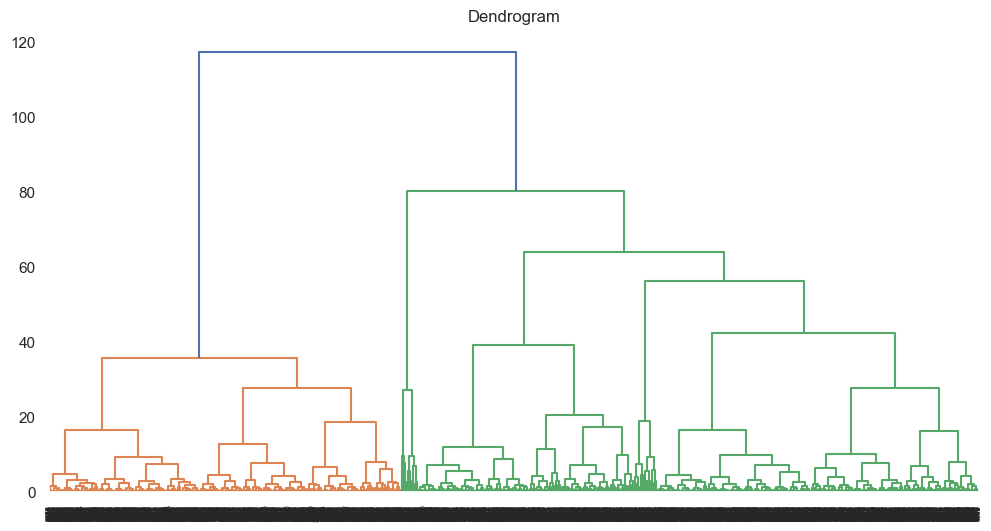

In [9]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(12,6))
plt.title('Dendrogram')
dend = shc.dendrogram(shc.linkage(x_scaled, method='ward'))

In [10]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
y = cluster.fit_predict(x_scaled)


In [25]:
X['Default'] = y
X

,income_per_age_group,payment,income_to_debt_ratio,trans_price_avg_lst3,Default
225488,4800.000000,14.75,162.711864,59.0,0
204489,5525.000000,11.75,470.212766,47.0,0
118925,19350.000000,45.75,422.950820,183.0,1
167440,20575.000000,14.25,1443.859649,57.0,0
75318,19000.000000,49.75,381.909548,199.0,1
...,...,...,...,...,...
28920,12750.000000,12.25,520.408163,49.0,0
343082,18425.000000,43.50,423.563218,174.0,1
263250,33500.000000,36.50,458.904110,146.0,0
307998,41350.000000,14.50,1425.862069,58.0,0


In [26]:
cluster_means = X.groupby('Default').mean()

In [27]:
cluster_means

,income_per_age_group,payment,income_to_debt_ratio,trans_price_avg_lst3
Default,,,,
0,20883.469956,16.382699,1604.206864,65.530797
1,18155.398982,40.221037,342.047499,160.884150


We can see here 2 segments:

1. segment 0 is where customers has more income per age, weekly payment is less, income to debt ratio is also less so it means person either has high salary or low debt, and transactions are also less


2. segment 1 is where customer salary and income to debt ratio is low, but weekly payment and trasactions are much more, it is likely customer will default.

In conclusion , we can build marketing campaigns on segment 0 .

In [28]:
X.corr()

,income_per_age_group,payment,income_to_debt_ratio,trans_price_avg_lst3,Default
income_per_age_group,1.000000,-0.008711,0.203585,-0.008711,-0.081957
payment,-0.008711,1.000000,-0.474891,1.000000,0.807454
income_to_debt_ratio,0.203585,-0.474891,1.000000,-0.474891,-0.263907
trans_price_avg_lst3,-0.008711,1.000000,-0.474891,1.000000,0.807454
Default,-0.081957,0.807454,-0.263907,0.807454,1.000000


In [29]:
X

,income_per_age_group,payment,income_to_debt_ratio,trans_price_avg_lst3,Default
225488,4800.000000,14.75,162.711864,59.0,0
204489,5525.000000,11.75,470.212766,47.0,0
118925,19350.000000,45.75,422.950820,183.0,1
167440,20575.000000,14.25,1443.859649,57.0,0
75318,19000.000000,49.75,381.909548,199.0,1
...,...,...,...,...,...
28920,12750.000000,12.25,520.408163,49.0,0
343082,18425.000000,43.50,423.563218,174.0,1
263250,33500.000000,36.50,458.904110,146.0,0
307998,41350.000000,14.50,1425.862069,58.0,0


In [30]:

x = X[['income_per_age_group', 'payment', 'income_to_debt_ratio','trans_price_avg_lst3']]
y = X[['Default']]

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state=42)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report 
import matplotlib.pyplot as plt

In [34]:
# some of the models i consider to use

models = [LogisticRegression(),XGBClassifier(),LGBMClassifier(),RandomForestClassifier(), LogisticRegression(class_weight='balanced')]

C:\Users\Nutzer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Performance for LogisticRegression()
[[882  49]
 [ 46 523]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       931
           1       0.91      0.92      0.92       569

    accuracy                           0.94      1500
   macro avg       0.93      0.93      0.93      1500
weighted avg       0.94      0.94      0.94      1500

                                      
AUC Score: 98.55589261881796
Gini prob is 97.11178523763593


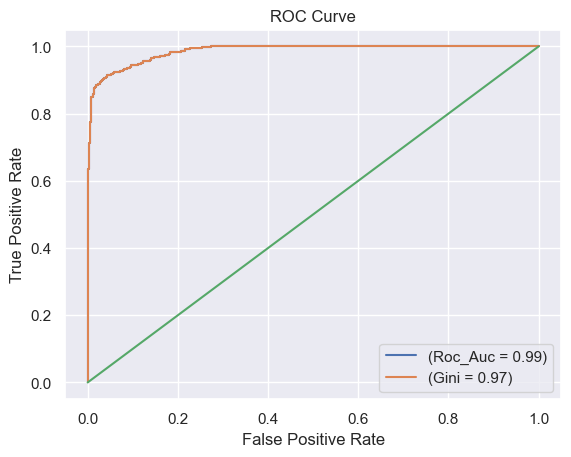

                                      
Model Performance for XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)
[[929   2]
 [  5 564]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       931
           1       1.00      0.99      0.99       569

    accuracy                          

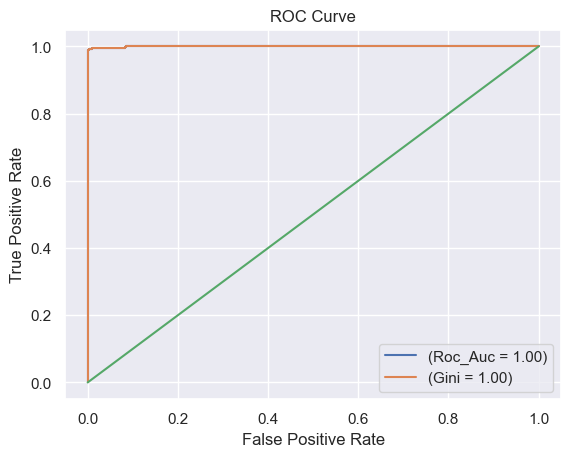

                                      
Model Performance for LGBMClassifier()
[[930   1]
 [  6 563]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       931
           1       1.00      0.99      0.99       569

    accuracy                           1.00      1500
   macro avg       1.00      0.99      1.00      1500
weighted avg       1.00      1.00      1.00      1500

                                      
AUC Score: 99.93647815244864
Gini prob is 99.8729563048973


C:\Users\Nutzer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nutzer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


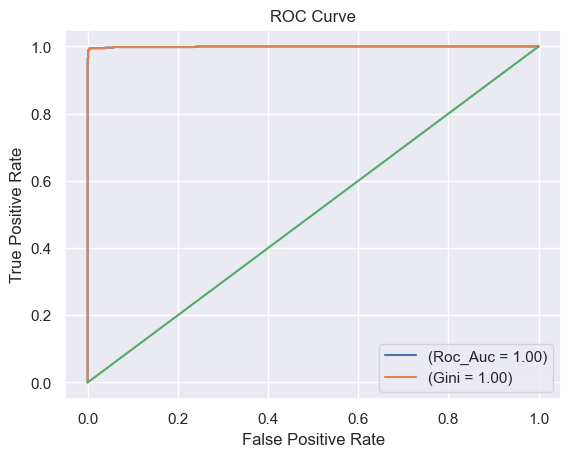

C:\Users\Nutzer\AppData\Local\Temp\ipykernel_3272\595111715.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  models.fit(X_train, y_train)


Model Performance for RandomForestClassifier()
[[929   2]
 [  5 564]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       931
           1       1.00      0.99      0.99       569

    accuracy                           1.00      1500
   macro avg       1.00      0.99      1.00      1500
weighted avg       1.00      1.00      1.00      1500

                                      
AUC Score: 99.95648800635784
Gini prob is 99.91297601271569


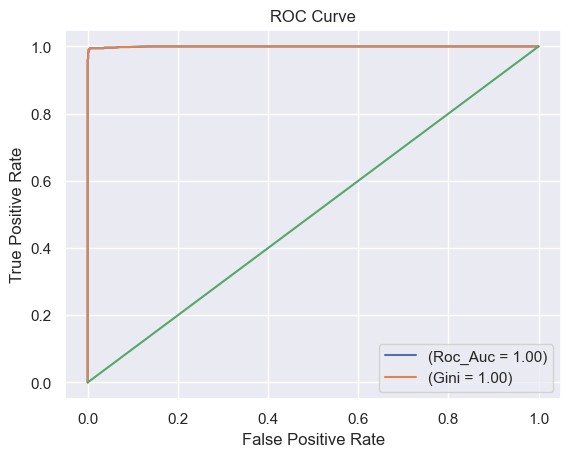

                                      
Model Performance for LogisticRegression(class_weight='balanced')
[[852  79]
 [ 38 531]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       931
           1       0.87      0.93      0.90       569

    accuracy                           0.92      1500
   macro avg       0.91      0.92      0.92      1500
weighted avg       0.92      0.92      0.92      1500

                                      
AUC Score: 98.55570384661125
Gini prob is 97.1114076932225


C:\Users\Nutzer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


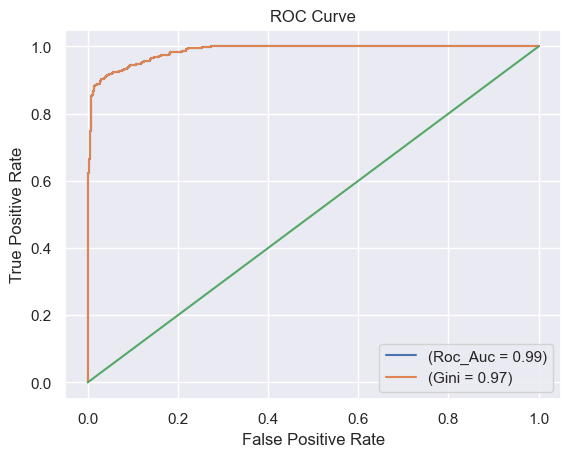

In [36]:
# Building a loop where all performance measures will be calculated for each ML model

# Confusion matrix
# Classification table
# Roc_auc_score
# Gini coefficient
# Roc curve


for i in models:
    models=i
    models.fit(X_train, y_train)
    
    y_pred = models.predict(X_test)
    y_prob = models.predict_proba(X_test)[:,1]


    roc_prob = roc_auc_score(y_test, y_prob)
    
    gini_prob = roc_prob*2-1
    
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    
    
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.figure()
    
    plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_prob)
    plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini_prob)
    plt.plot([0, 1], [0, 1])
    plt.xlim()
    plt.ylim()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    
    
    print('Model Performance for',i)    
   
    print(confusion_matrix)
    print(classification_report(y_test, y_pred))
    print("                                      ")
    print('AUC Score:', roc_auc_score(y_test, y_prob)*100)
    print('Gini prob is', gini_prob*100)
    plt.show()
    print("="*70)
    print("                                      ")